# Counting Number of Object(s)

## Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
!pip install cvlib
import cvlib as cvl
from numpy.lib.polynomial import poly
from cvlib.object_detection import draw_bbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 84.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046368 sha256=c70bb43c78c9ea253711263caa0a3c0d2670d1b4493d6a3bee6b1b985778795a
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=e9e5536b83ded44f9d973ed1c9911bfa729d6ce3944728f8390909a98b33bb4e
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


## Displaying the image

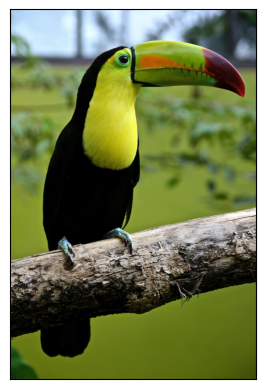

In [10]:
img = cv2.imread('toucan.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## Function to count objects

In [13]:
def count_object(img):
  box, labels, count = cvl.detect_common_objects(img, confidence=0.5, nms_thresh=0.5, model='yolov4', enable_gpu=False)
  output = draw_bbox(img, box, labels, count)
  print(r'Number of objects :', len(labels))
  print('Labels of the object : ', labels)
  plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
  plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
  plt.show()

## Output Result

Number of objects : 1
Labels of the object :  ['bird']


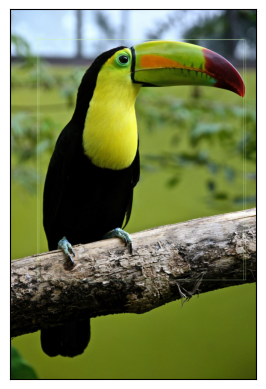

In [14]:
count_object(img)

# Area Calculation of Object(s)

## Function to Calculate Area

In [15]:
def measure_object_area(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Applying inverse binary thresholding to obtain a inversed binary image using otsu thresholding method
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    # Find contours in the binary image
    contours, hierarchies = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    total_area = 0
    # Iterating through the whole area
    for contour in contours:
        # Calculate the area of each contour
        area = cv2.contourArea(contour)
        total_area += area

    # Print the measured area
    print("Object area:", total_area)
    plt.imshow(binary, cmap = 'gray')

## Providing the image path

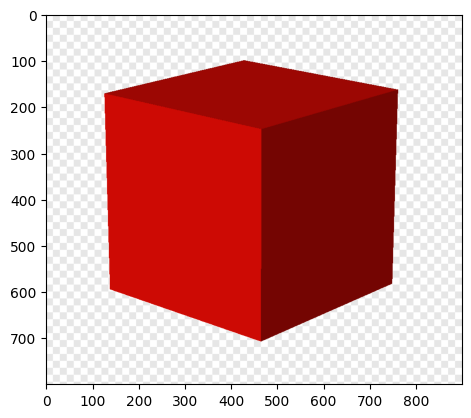

In [16]:
# Providing the path of the image
image_path = "cube.jpg"
plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))

## Output Result

Object area: 319789.0


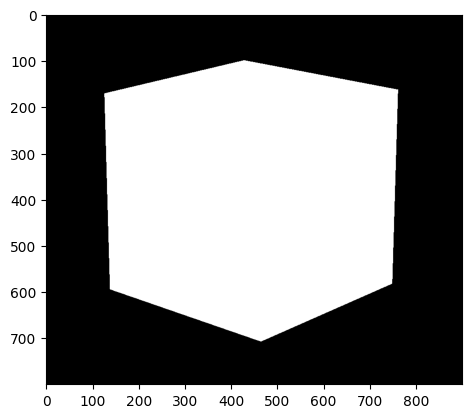

In [17]:
# calling the function to measure the area of the object in the image
measure_object_area(image_path)